In [1]:
import numpy as np
import math
import pandas as pd
import seaborn as sns
import copy


In [9]:
##Functions
def t(x,i):
    if i == 1 :
        a = (x+1)/(x+3)
        return a
    else:
        a = (2)/(4-x)
        return a

def inv(x,n):
    return math.floor(x*n)

def tf(F,j):
    n = F.size
    Aux = copy.deepcopy(F)
    
    for i in range(n):
        x = i/n
        x = t(x,j)
        Aux[i] = F[inv(x,n)]
    return Aux


def A(x):
    if x<1/2:
        return (1/2)*(math.log(abs(2/pow(x-1,2)))+math.log(2))
    else:
        return (1/2)*(math.log(abs(2/pow(x,2)))+math.log(2))

def Avector(n):
    AV = np.zeros(n)
    for i in range(n):
        AV[i] = A(i/n)
    return AV

def G(N,n):
    F = np.zeros(n)
    for i in range(N):
        F1 = tf(F,1)
        F2 = tf(F,2)
        for j in range(n):
            F1[j] = F1[j] + A(t(j/n,1))
            F2[j] = F2[j] + A(t(j/n,2))
        F = (np.maximum(F1,F2)+F)/2
        F = F - np.amax(F)
    return [F,F1,F2]

#T 2xmod1
def T(F):
    Aux = copy.deepcopy(F)
    n = F.size
    for i in range(n):
        x = i/n
        x = 2*x
        if x > 1:
            x = x - 1
        j = math.floor(n*x)
        if j>=n:
            j=n-1
        
        Aux[i] = F[j]
    return Aux

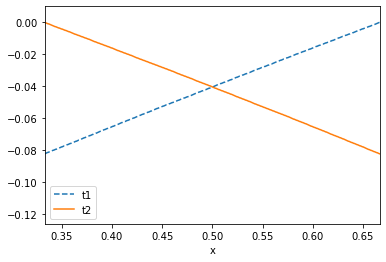

In [30]:
## G Iterations and plot
n = 2000
N = 30
Result = G(N,n)
F1 = Result[1]
F2 = Result[2]
yup = F2[665]
F1 = F1 - yup
F2 = F2 - yup

F = list(F1)
X = list(np.array(range(n))/n)
D = list(zip(X,F))
Resultd1 = pd.DataFrame(data = D ,columns = ["x","t1"])

F = list(F2)
X = list(np.array(range(n))/n)
D = list(zip(X,F))

Resultd2 = pd.DataFrame(data = D ,columns = ["x","t2"])

ymin = Result[0][1000]

##PLOT
ax = Resultd1.plot(x = Resultd1.columns.values[0], y = Resultd1.columns.values[1],style = '--');
Resultd2.plot(ax=ax,x = Resultd2.columns.values[0], y = Resultd2.columns.values[1]);
ax.set_ylim([ymin-0.01,0.01])
ax.set_xlim([1/3,2/3])


#save plot
ax.figure.savefig('../imagens/ex4_branches.pdf')